# Supervised classification

In the data.csv there are letters (uppercases and lowercases) and numbers, 28x28 pixels in a row format.

* First, you need to know which labels are which, meaning you need to visualize some data to realize which number labels represents a letter, or a number.

In [1]:
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
zf=zipfile.ZipFile('data_all.zip')
number=pd.read_csv(zf.open('data_all.csv'))
number.head()

e    1    2    3    4    5    6    7    8    9  ...  775  776  777  778  \
0  36.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2   3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  33.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  30.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

   779  780  781  782  783  784  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 785 columns]

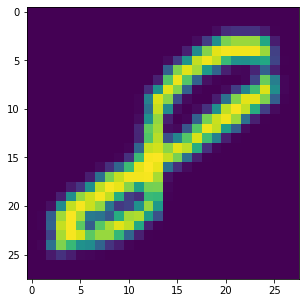

In [3]:
plt.figure(figsize=(5,5))
plt.imshow(number.values[8,1:].reshape(28,28))
plt.show();

In [4]:
import keras
from keras.utils import to_categorical
from keras.layers import Dropout, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.layers import Dense, Flatten

Using TensorFlow backend.


* Now, try to train a classifier model to predict the uppercases. Use every single model you know for classification.

In [5]:
input_shape=(28, 28, 1)
X=np.array(number.iloc[:,1:])
y=to_categorical(np.array(number.iloc[:,0]))
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)
X_train=X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test=X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train=X_train.astype('float')/255
X_test=X_test.astype('float')/255

In [6]:
batch=256
n_clases=62
epocas=55

In [7]:
modelo=Sequential()

modelo.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', input_shape=input_shape))
modelo.add(MaxPooling2D((2,2)))
modelo.add(Dropout(0.25))

modelo.add(Conv2D(64, (3,3), activation='relu'))
modelo.add(MaxPooling2D((2,2)))
modelo.add(Dropout(0.25))

modelo.add(Conv2D(128, (3,3), activation='relu'))
modelo.add(Dropout(0.4))
modelo.add(Flatten())

modelo.add(Dense(128, activation='relu'))
modelo.add(Dropout(0.3))

modelo.add(Dense(n_clases, activation='softmax'))

modelo.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [8]:
modelo.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)        

In [9]:
historico=modelo.fit(X_train, y_train, batch_size=batch, epochs=epocas, verbose=1)

Epoch 1/55
93057/93057 [==============================] - 99s 1ms/step - loss: 1.5214 - accuracy: 0.5897
Epoch 2/55
93057/93057 [==============================] - 98s 1ms/step - loss: 0.7496 - accuracy: 0.7592
Epoch 3/55
93057/93057 [==============================] - 100s 1ms/step - loss: 0.6366 - accuracy: 0.7879
Epoch 4/55
93057/93057 [==============================] - 98s 1ms/step - loss: 0.5832 - accuracy: 0.8027
Epoch 5/55
93057/93057 [==============================] - 108s 1ms/step - loss: 0.5545 - accuracy: 0.8113
Epoch 6/55
93057/93057 [==============================] - 98s 1ms/step - loss: 0.5289 - accuracy: 0.8173
Epoch 7/55
93057/93057 [==============================] - 118s 1ms/step - loss: 0.5104 - accuracy: 0.8232
Epoch 8/55
93057/93057 [==============================] - 126s 1ms/step - loss: 0.4970 - accuracy: 0.8261
Epoch 9/55
93057/93057 [==============================] - 127s 1ms/step - loss: 0.4852 - accuracy: 0.8293
Epoch 10/55
93057/93057 [=========================

In [10]:
score=modelo.evaluate(X_test, y_test, verbose=0)

print ('Perdida (testeo)', score[0])
print ('Accuracy (testeo)', score[1])

Perdida (testeo) 0.37679643129856644
Accuracy (testeo) 0.8621534705162048


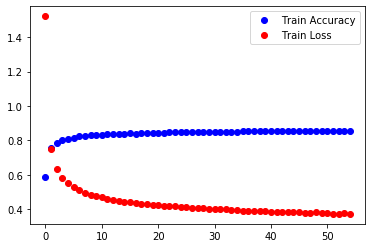

In [11]:
acc=historico.history['accuracy']
loss=historico.history['loss']
epocas=range(len(acc))

plt.plot(epocas, acc, 'bo', label='Train Accuracy')
plt.plot(epocas, loss, 'ro', label='Train Loss')
plt.legend()
plt.plot();

* Try to do the same thing with lowercases.

In [ ]:
# Your code here

* Try to do the same thing with numbers.

In [ ]:
# Your code here